In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pyemma
import pyemma.msm as msm

In [2]:
def delete_dup(in_arr):
    fin = []
    for i, vl in enumerate(in_arr):
        if vl not in fin:
            fin.append(vl)
    fin = np.array(fin)
    return fin
def find_cl_in_paths(data):
    n = []
    for i, vl in enumerate(data):
        n.append(vl[1:-1])
    n = np.concatenate(n)
    n = delete_dup(n)  
    n = np.sort(n)
    return n
def weight_of_cl_in_paths(cluster, paths, per_path, weights):
    w = 0
    if weights == None:
        for l, m in enumerate(paths):
            if cluster in m:
                w += per_path[l]
    else:
        for l, m in enumerate(paths):
            if cluster in m:
                w += per_path[l]*weights[cluster]
    return w
def cut_matrix(matrix, ind):
    cut1 = []
    for i, vl in enumerate(ind):
        cut1.append(matrix[:, vl])
    cut1 = np.array(cut1)
    cut2 = []
    for i, vl in enumerate(ind):
        cut2.append(cut1[:, vl])
    cut2 = np.array(cut2)
    return cut2

In [3]:
A = np.arange(2480, 2490)
B = np.arange(2490, 2500)
process = 'A-I_to_I-A'
M2 = pyemma.load('MSM/pyemma/msm_enspara_tprobs.pyemma')
tpt = msm.tpt(M2, A, B)

In [4]:
paths = np.load(f'TPT_0/pathways_{process}.npy', allow_pickle=True)
fsub = np.load(f'TPT_0/fluxsub_{process}.npy')
pathfluxes = np.load(f'TPT_0/pathfluxes_{process}.npy')

In [6]:
d = pd.read_csv(f'TPT_0/pathways_{process}.csv')
per_path = []
for o, p in enumerate(d['%path']):
    per_path.append(float(p[:5])/100)
#weights = M2.stationary_distribution
ls_clusters = find_cl_in_paths(paths)
ls_clusters_weights = []
for l, m in enumerate(ls_clusters):
    w = weight_of_cl_in_paths(m, paths, per_path, weights=None)
    ls_clusters_weights.append(w)
ls_clusters_weights = np.array(ls_clusters_weights)

a = np.around(ls_clusters_weights, decimals=3)
b = []
c = []
for k, j in enumerate(a):
    if j > 0.01:
        b.append(j)
        c.append(ls_clusters[k])

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Fig. 1


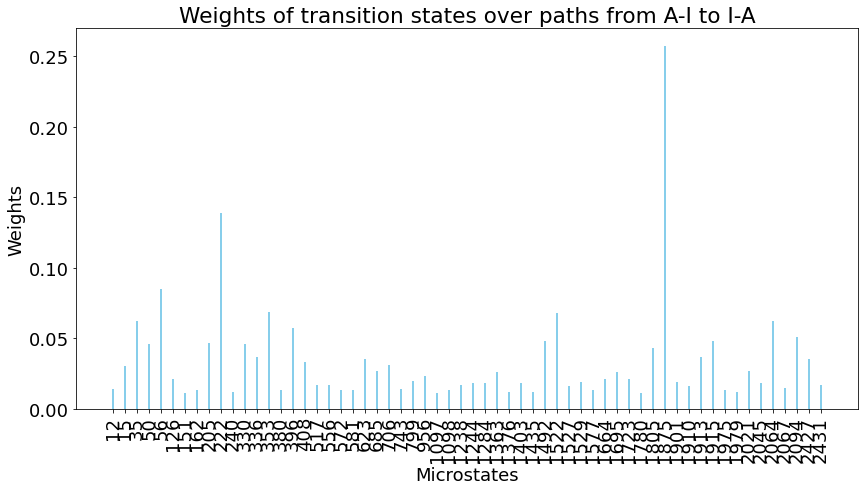

In [8]:
labels = []
for num in c:
    labels.append(str(num))

font = {'family': 'Times New Roman',
        'weight': 'medium',
        'size': 18}

plt.rc('font', **font)

figure(num=None, figsize=(14, 7))

Labels = labels
y_pos = np.arange(len(Labels))
plt.bar(y_pos, b, width=0.2, color='skyblue')

plt.xticks(y_pos, Labels, rotation='vertical')
plt.ylabel('Weights')
plt.xlabel('Microstates')
plt.title('Weights of transition states over paths from A-I to I-A')
# plt.savefig(f'TPT_0/Weights_of_transition_states_over_paths_1.png',  bbox_inches="tight",
#            pad_inches=0.5, transparent=True, facecolor='w', edgecolor='w', orientation='landscape')
print ('Fig. 1')
plt.show()

In [9]:
first_cl = []
second_cl = []
for j, p in enumerate(paths):
    if len(p) > 3:
        first_cl.append(p[1])
        second_cl.append(p[-2])
    elif len(p) == 3:
        first_cl.append(p[1])
first_cl = delete_dup(first_cl)
second_cl = delete_dup(second_cl)
print ('First clusters: %s'%first_cl)
print ('Second clusters: %s'%second_cl)

First clusters: [1805 1492   35  353 1875   56 1522  743 2348 1723 1915 2055 1618 2083
 1664 1218  956  526 1780 1435 2427 1097  482 1901  289 2166  305  704
 1896  517 2420  344  226  433  369  649 2045  311 1249 1979  862 1098
  556 2246  456    1  551 1084   69  799  336 1869  224 1527  514  291
  480 1244 2250 1376  330  351 1910   63 1156 2145  212 1238 1529   66
  230  686 1556 1599  944 2374  682 1362  153   37 1090 1964  952]
Second clusters: [ 222 2021  706  685 1915 2094 2064 1910 1577 2085   12  162   35  205
 1363 2195 1901  517  353 1522 1721   15  396  572 1305 1975  380 2042
 1731  823  126  656 1527 1913 2187 1098  687 1279 2431  942   32 1011
 2423 1679 2054  240 2080 2320  325  211 1979 1333  734   19 1376  308
  913  336 2314 1063    4 2307 1004 2366   89  186 1244 2356 1973 2273
 2110 1695 1403 1608  725  556 1284]


In [10]:
high_w_first_cls = []
for m, cl in enumerate(c):
    if cl in first_cl:
        high_w_first_cls.append(cl)
high_w_second_cls = []
for m1, cl1 in enumerate(c):
    if cl1 in second_cl:
        high_w_second_cls.append(cl1)
print ('Highly weighted first clusters: %s'%high_w_first_cls)
print ('Highly weighted second clusters: %s'%high_w_second_cls)
connective_clusters = delete_dup(np.concatenate([high_w_first_cls] + [high_w_second_cls]))
print ('Highly weighted connective-states: %s'%connective_clusters)

Highly weighted first clusters: [35, 56, 330, 336, 353, 517, 556, 743, 799, 956, 1097, 1098, 1238, 1244, 1376, 1435, 1492, 1522, 1527, 1529, 1664, 1723, 1780, 1805, 1875, 1901, 1910, 1915, 1979, 2045, 2427]
Highly weighted second clusters: [12, 15, 35, 126, 162, 205, 222, 240, 336, 353, 380, 396, 517, 556, 572, 685, 706, 1098, 1244, 1284, 1363, 1376, 1403, 1522, 1527, 1577, 1695, 1901, 1910, 1913, 1915, 1975, 1979, 2021, 2064, 2094, 2431]
Highly weighted connective-states: [  35   56  330  336  353  517  556  743  799  956 1097 1098 1238 1244
 1376 1435 1492 1522 1527 1529 1664 1723 1780 1805 1875 1901 1910 1915
 1979 2045 2427   12   15  126  162  205  222  240  380  396  572  685
  706 1284 1363 1403 1577 1695 1913 1975 2021 2064 2094 2431]


In [11]:
print ("Fig. 2")
d

Fig. 2


,Unnamed: 0,Path flux,%path,%of total,Path
0,0,1.858913e-07,0.926 %,0.926 %,[2486 1805 1522 222 2495]
1,1,1.752382e-07,0.873 %,1.799 %,[2489 1492 396 2021 2493]
2,2,1.727157e-07,0.860 %,2.659 %,[2483 35 2490]
3,3,1.674084e-07,0.834 %,3.493 %,[2486 1805 1522 353 706 2494]
4,4,1.525908e-07,0.760 %,4.254 %,[2485 353 685 2494]
...,...,...,...,...,...
996,996,3.676109e-09,0.018 %,75.912 %,[2485 551 897 325 2493]
997,997,3.673715e-09,0.018 %,75.931 %,[2485 1780 913 419 823 2493]
998,998,3.673445e-09,0.018 %,75.949 %,[2480 56 0 1695 222 2496]
999,999,3.660598e-09,0.018 %,75.967 %,[2483 2427 1063 2493]


Considering important pathways (highly weighted), how? 
There are some repeated clusters which are firstly formed from the "reactants" or finnaly formed before tranforming to "products". 
The nework can be decomposited into many different pathways (Fig. 2) with corresponding fluxes. 
We have some firstly formed connective-states: [35, 56, 330, 336, 353, 1492, 1522, 1805, 1875, 1915, 2427]
or lastly formed: [15, 35, 205, 222, 336, 353, 396, 685, 706, 1363, 1522, 1695, 1913, 1915, 2021, 2064, 2094]
So the probabily of forming state "j" first or "k" last is given:
$$ P(j\;first) = \frac{1}{F}\displaystyle\sum_{i} f(P_{i})\chi_{i}\;(j\;first)
$$
$$ P(k\;last) = \frac{1}{F}\displaystyle\sum_{i} f(P_{i})\chi_{i}\;(k\;last)
$$
$$ P(j, k\;first, last) = \frac{1}{F}\displaystyle\sum_{i} f(P_{i})\chi_{i}\;(j, k\;first, last)
$$
In which: $\chi_{j} = 1$ if j/k forms first/last in pathway $P_{i}$, and 0 otherwise. F is the total flux, and $f(P_{i})$ is pathflux of the pathway $P_{i}$.
Calculating P(j first) or P(k last) or P(j_first and k_last) which j, k are highly weighted connective states (T-S) in pathways. The observed results will indicate probability of forming j, k states as the first, last or sequentially.

In [12]:
def prob_form_connective_states (cl1, cl2, F, paths, pathfluxes):
    x = 0
    for i, vl in enumerate(paths):
        if cl1 != None and cl2 == None:
            if vl[1] == cl1:
                x += pathfluxes[i]
        elif cl1 == None and cl2 != None:
            if len (vl)>3 and vl[-2] == cl:
                x += pathfluxes[i]
        elif cl1 != None and cl2 != None:
            if len(vl)>3 and vl[1] == cl1 and vl[-2] == cl2:
                x += pathfluxes[i]
    prob = x/F
    return prob

In [13]:
prob_form_high_w_first_cls = []
for cl in high_w_first_cls:
    t = prob_form_connective_states(cl1 = cl, cl2 =None, F= tpt.total_flux, paths = paths, 
                                    pathfluxes = pathfluxes)
    prob_form_high_w_first_cls.append([int(cl), t])
prob_form_high_w_first_cls = np.array(prob_form_high_w_first_cls)
for st, probs in enumerate(prob_form_high_w_first_cls):
    print ('Probability of firstly forming state %d: %3.3f'%(probs[0], probs[1]*100), '%')

Probability of firstly forming state 35: 0.860 %
Probability of firstly forming state 56: 7.372 %
Probability of firstly forming state 330: 0.047 %
Probability of firstly forming state 336: 0.841 %
Probability of firstly forming state 353: 0.760 %
Probability of firstly forming state 517: 0.269 %
Probability of firstly forming state 556: 0.143 %
Probability of firstly forming state 743: 1.376 %
Probability of firstly forming state 799: 0.330 %
Probability of firstly forming state 956: 2.291 %
Probability of firstly forming state 1097: 1.140 %
Probability of firstly forming state 1098: 0.094 %
Probability of firstly forming state 1238: 0.033 %
Probability of firstly forming state 1244: 0.049 %
Probability of firstly forming state 1376: 0.104 %
Probability of firstly forming state 1435: 1.235 %
Probability of firstly forming state 1492: 3.139 %
Probability of firstly forming state 1522: 2.005 %
Probability of firstly forming state 1527: 0.082 %
Probability of firstly forming state 1529: 

In [55]:
firts_mic = []
for i, path in enumerate(paths):
    firts_mic.append(path[1])
print (delete_dup(firts_mic))

[1805 1492   35  353 1875   56 1522  743 2348 1723 1915 2055 1618 2083
 1664 1218  956  526 1780 1435 2427 1097  482 1901  289 2166  305  704
 1896  517 2420  344  226  433  369  649 2045  311 1249 1979  862 1098
  556 2246  456    1  551 1084   69  799  336 1869  224 1527  514  291
  480 1244 2250 1376  330  351 1910   63 1156 2145  212 1238 1529   66
  230  686 1556 1599  944 2374  682 1362  153   37 1090 1964  952]


In [56]:
fin = delete_dup(firts_mic)
len(fin)

83

In [61]:
prob_form_high_w_first_cls = []
for cl in fin:
    t = prob_form_connective_states(cl1 = cl, cl2 =None, F= tpt.total_flux, paths = paths, 
                                    pathfluxes = pathfluxes)
    prob_form_high_w_first_cls.append([int(cl), t])
prob_form_high_w_first_cls = np.array(prob_form_high_w_first_cls)
gr = []
x = 0
for st, probs in enumerate(prob_form_high_w_first_cls):
#     print ('Probability of firstly forming state %d: %3.3f'%(probs[0], probs[1]*100), '%')
    if probs[1]> 0.01:
        print ('Probability of firstly forming state %d: %3.3f'%(probs[0], probs[1]*100), '%')
        gr.append(probs[0])
        x += probs[1]

Probability of firstly forming state 1805: 4.284 %
Probability of firstly forming state 1492: 3.139 %
Probability of firstly forming state 1875: 25.750 %
Probability of firstly forming state 56: 7.372 %
Probability of firstly forming state 1522: 2.005 %
Probability of firstly forming state 743: 1.376 %
Probability of firstly forming state 1723: 2.126 %
Probability of firstly forming state 1915: 1.565 %
Probability of firstly forming state 1664: 2.099 %
Probability of firstly forming state 956: 2.291 %
Probability of firstly forming state 1780: 1.072 %
Probability of firstly forming state 1435: 1.235 %
Probability of firstly forming state 2427: 3.542 %
Probability of firstly forming state 1097: 1.140 %
Probability of firstly forming state 2045: 1.814 %


In [16]:
prob_form_high_w_second_cls = []
for cl in high_w_second_cls:
    t = prob_form_connective_states(cl1 = None, cl2 = cl, 
                                    F= tpt.total_flux, paths = paths, 
                                    pathfluxes = pathfluxes)
    prob_form_high_w_second_cls.append([int(cl), t])
prob_form_high_w_second_cls = np.array(prob_form_high_w_second_cls)
for st, probs in enumerate(prob_form_high_w_second_cls):
    print ('Probability of forming final state %d: %3.3f'%(probs[0], 
                                                             probs[1]*100), '%')

Probability of forming final state 12: 0.432 %
Probability of forming final state 15: 2.651 %
Probability of forming final state 35: 5.343 %
Probability of forming final state 126: 0.178 %
Probability of forming final state 162: 0.426 %
Probability of forming final state 205: 4.738 %
Probability of forming final state 222: 13.945 %
Probability of forming final state 240: 1.212 %
Probability of forming final state 336: 0.085 %
Probability of forming final state 353: 0.988 %
Probability of forming final state 380: 1.275 %
Probability of forming final state 396: 0.799 %
Probability of forming final state 517: 0.438 %
Probability of forming final state 556: 0.028 %
Probability of forming final state 572: 1.347 %
Probability of forming final state 685: 2.687 %
Probability of forming final state 706: 3.089 %
Probability of forming final state 1098: 0.602 %
Probability of forming final state 1244: 0.200 %
Probability of forming final state 1284: 0.094 %
Probability of forming final state 1363

In [17]:
first_cls = []
for l1, st1 in enumerate(prob_form_high_w_first_cls):
    if st1[1]>0.04:
        first_cls.append([int(st1[0]), st1[1]])
second_cls = []
for l2, st2 in enumerate(prob_form_high_w_second_cls):
    if st2[1]>0.04:
        second_cls.append([int(st2[0]), st2[1]]) 
first_cls = np.array(first_cls)
second_cls = np.array(second_cls)

In [18]:
prob_form_high_w_cls = []
for cl1 in first_cls[:, 0]:
    for cl2 in second_cls[:, 0]:
        t = prob_form_connective_states(cl1 = cl1, cl2 = cl2, 
                                    F= tpt.total_flux, paths = paths, 
                                    pathfluxes = pathfluxes)
        prob_form_high_w_cls.append([np.array([cl1, cl2]).astype(dtype = int),  t])
prob_form_high_w_cls = np.array(prob_form_high_w_cls)
for st, probs in enumerate(prob_form_high_w_cls):
    print ('Probability of forming final state %s: %3.3f'%(probs[0], 
                                                             probs[1]*100), '%')

Probability of forming final state [56 35]: 0.761 %
Probability of forming final state [ 56 205]: 0.496 %
Probability of forming final state [ 56 222]: 1.039 %
Probability of forming final state [  56 2094]: 0.287 %
Probability of forming final state [1805   35]: 0.640 %
Probability of forming final state [1805  205]: 0.023 %
Probability of forming final state [1805  222]: 1.109 %
Probability of forming final state [1805 2094]: 0.088 %
Probability of forming final state [1875   35]: 1.219 %
Probability of forming final state [1875  205]: 1.432 %
Probability of forming final state [1875  222]: 5.076 %
Probability of forming final state [1875 2094]: 2.204 %
Probability of forming final state [1805   35]: 0.640 %
Probability of forming final state [1805  205]: 0.023 %
Probability of forming final state [1805  222]: 1.109 %
Probability of forming final state [1805 2094]: 0.088 %


/home/ella/anaconda3/envs/msm/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [19]:
sum(first_cls[:,1])+sum(second_cls[:, 1]) -sum(prob_form_high_w_cls[:, 1])

0.5459676441093484

In [21]:
def find_ts1(cl1, cl2, paths): 
    st_cl1 = []
    st_cl2 = []
    for i1, st1 in enumerate(cl1):
        a = []
        for p, path in enumerate(paths):
            if len (path) >3:
                if path[1] == st1 and path[-2] not in cl2:
                    a.append(path[2:-1])
        a = np.concatenate(a)
        st_cl1.append(np.sort(delete_dup(a)))
    for i2, st2 in enumerate(cl2):
        b = []
        for p, path in enumerate(paths):
            if len (path) >3:
                if path[-2] == st2 and path[1] not in cl1:
                    b.append(path[1:-2])
        b = np.concatenate(b)
        st_cl2.append(np.sort(delete_dup(b)))
    st_cl1 = np.array(st_cl1)
    st_cl2 = np.array(st_cl2)
    return  st_cl1, st_cl2

def find_ts2(cl1, cl2, paths):
    st_cl1 = []
    for i1, st1 in enumerate(cl1):
        a = []
        for i2, st2 in enumerate(cl2):
            b = []
            for p, path in enumerate(paths):
                if len (path) >3:
                    if path[1] == st1 and path[-2] == st2:
                        b.append(path[2:-2])
            b = delete_dup(np.concatenate(b))
            a.append(b)
        st_cl1.append(a)
    st_cl1 = np.array(np.concatenate(st_cl1))
    return  st_cl1
ts1, ts2 = find_ts1(cl1= first_cls[:, 0].astype(dtype = int), cl2= second_cls[:, 0].astype(dtype = int),
         paths = paths)
ts3 = find_ts2(cl1= first_cls[:, 0].astype(dtype = int), cl2= second_cls[:, 0].astype(dtype = int),
         paths = paths)

/home/ella/anaconda3/envs/msm/lib/python3.6/site-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/ella/anaconda3/envs/msm/lib/python3.6/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [22]:
data = np.concatenate([ts1] + [ts2] + [ts3])

In [23]:
len(data)

24

In [24]:
def different_part(num, data):
    A = []
    for vl in data[num]:
        if num != 0 and num != len(data)-1:
            x = delete_dup(np.concatenate([np.concatenate(data[0:num]), np.concatenate(data[num+1:])]))
            if vl not in x:
                A.append(vl)
        elif num == 0:
            x = delete_dup(np.concatenate(data[1:]))
            if vl not in x:
                A.append(vl)
        elif num == len(data) -1:
            x = delete_dup(np.concatenate(data[:num]))
            if vl not in x:
                A.append(vl)
    return np.array(A)

In [25]:
t = []
for i in range(len(data)):
    t.append(different_part(i, data = data))

In [26]:
a = []
for gr in t:
    if len(gr) != 0:
        a.append(gr)

In [27]:
print (a)

[array([ 246, 1044, 1055, 1070, 1333, 2110], dtype=int32), array([ 114,  119,  186,  193,  211,  238,  249,  269,  296,  322,  364,
        432,  467,  491,  515,  533,  537,  570,  572,  575,  609,  644,
        693,  752,  770,  796,  823,  903, 1004, 1039, 1063, 1141, 1148,
       1171, 1221, 1234, 1279, 1283, 1290, 1304, 1417, 1518, 1531, 1576,
       1776, 1795, 1908, 1911, 1928, 1981, 2054, 2085, 2095, 2195, 2245],
      dtype=int32), array([  66,  224,  348,  559,  686, 1081, 1292, 1568, 1715, 1729],
      dtype=int32), array([   2,   69,  282,  321,  369, 2083, 2374], dtype=int32), array([  59,  394,  439,  456,  593, 1069, 1286, 1555, 1639, 1677, 1852,
       2130, 2341, 2399, 2465], dtype=int32), array([ 255,  272,  344,  505,  553, 1618, 1794, 1922, 2175], dtype=int32), array([2046], dtype=int32), array([2227], dtype=int32), array([ 952,  993, 1745, 1903], dtype=int32), array([ 299, 1422, 1626,  343,  157,  626,  786,  374, 1153,  486,   92],
      dtype=int32), array([1229,

In [28]:
total_cls = delete_dup(np.concatenate(data))
total_dif_cls = delete_dup(np.concatenate(a))

In [29]:
overlap = []
for vl in total_cls:
    if vl not in total_dif_cls:
        overlap.append(vl)
overlap = np.array(overlap)

In [31]:
repeat = []
for ind in overlap:
    w = []
    for i, vl in enumerate(data):
        if ind in vl:
            w.append(i)
    repeat.append(np.array(w))
repeat = np.array(repeat)

/home/ella/anaconda3/envs/msm/lib/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [33]:
k = []
for i1, vl1 in enumerate(repeat):
    h = []
    for i2, vl2 in enumerate(repeat):
        if np.array_equal(vl1, vl2) == True:
                h.append([overlap[i1],overlap[i2]])
    k.append(np.sort(delete_dup(np.concatenate(h))))

In [34]:
new_array = [tuple(row) for row in k]
uniques = np.unique(new_array)

/home/ella/anaconda3/envs/msm/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [35]:
n_uniques = []
for row in uniques:
    n_uniques.append(np.array(row))
n_uniques = np.array(n_uniques)

/home/ella/anaconda3/envs/msm/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [36]:
A = []
B = []
for row in n_uniques:
    if len(row) <2:
        A.append(row)
    if len(row) >1:
        B.append(row)
A = np.array(np.concatenate(A))
B.append(A)
test = np.concatenate([a] +[B])
final = ([[56], [1805], [1875], [35], [205], [222], [2094], np.arange(2480, 2490), np.arange(2490, 2500)])

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [37]:
h = []
for f in final:
    h.append(np.array(f))
for t in test:
    h.append(np.array(t))

In [38]:
final_clusters = []
for arr in h:
    final_clusters.append(np.array(arr, dtype = 'int64'))
final_clusters = np.array(final_clusters, dtype = object)

In [39]:
final_clusters

array([array([56]), array([1805]), array([1875]), array([35]),
       array([205]), array([222]), array([2094]),
       array([2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489]),
       array([2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499]),
       array([ 246, 1044, 1055, 1070, 1333, 2110]),
       array([ 114,  119,  186,  193,  211,  238,  249,  269,  296,  322,  364,
        432,  467,  491,  515,  533,  537,  570,  572,  575,  609,  644,
        693,  752,  770,  796,  823,  903, 1004, 1039, 1063, 1141, 1148,
       1171, 1221, 1234, 1279, 1283, 1290, 1304, 1417, 1518, 1531, 1576,
       1776, 1795, 1908, 1911, 1928, 1981, 2054, 2085, 2095, 2195, 2245]),
       array([  66,  224,  348,  559,  686, 1081, 1292, 1568, 1715, 1729]),
       array([   2,   69,  282,  321,  369, 2083, 2374]),
       array([  59,  394,  439,  456,  593, 1069, 1286, 1555, 1639, 1677, 1852,
       2130, 2341, 2399, 2465]),
       array([ 255,  272,  344,  505,  553, 1618, 1794, 1922, 

In [40]:
(tpt_sets, tpt2_coarse) = tpt.coarse_grain(final_clusters)

In [41]:
tpt_sets[0]

OrderedSet([2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489])

In [42]:
print (tpt2_coarse.A)
print (tpt2_coarse.B)
print ("pi coarse: ")
print (tpt2_coarse.stationary_distribution)
print ("sum = ",np.sum(tpt2_coarse.stationary_distribution))
print ("committors : ")
print (tpt2_coarse.committor)
print (tpt2_coarse.backward_committor)
print ("F coarse : ")
print (tpt2_coarse.gross_flux)
print ("F net coarse : ")
print (tpt2_coarse.net_flux)

[0]
[47]
pi coarse: 
[2.77903430e-04 9.13356790e-03 1.08621063e-04 7.06433341e-03
 2.42101133e-03 1.10792457e-03 4.55749396e-03 2.04697452e-04
 3.74718869e-03 3.13910578e-02 1.75762204e-03 3.15446155e-03
 5.24141988e-03 5.60121700e-03 6.38384538e-04 1.81706431e-04
 2.37767827e-03 6.79455830e-03 2.88858780e-03 1.48767276e-02
 2.29638383e-03 2.05088219e-03 7.32558345e-03 7.01589492e-03
 6.66314997e-03 4.57774066e-03 3.94570436e-03 2.23131128e-03
 4.23183349e-03 7.97761836e-04 5.75394499e-03 3.39254434e-03
 2.64685027e-03 4.53425113e-03 6.52781414e-03 3.29108823e-04
 2.00116376e-03 3.14611863e-03 7.59439008e-04 2.41260529e-03
 1.28640280e-02 1.20405984e-02 2.06569031e-03 2.99087408e-03
 1.28601457e-04 3.85940813e-01 4.16768048e-01 1.68665281e-04]
sum =  1.0091335679029427
committors : 
[0.         0.34598331 0.16872273 0.33827994 0.34957337 0.40634017
 0.34890552 0.4402532  0.3470038  0.35064346 0.33715254 0.39424545
 0.34598284 0.34550574 0.34643712 0.34788765 0.34641855 0.3690241
 0.346

In [ ]:
np.save('pathways_clusters.npy', important_cls)